r 2
sample [2]
r 10
sample [2, 10]
r 5
sample [2, 10, 5]
r 8
sample [2, 10, 5, 8]
r 25
sample [2, 10, 5, 8, 25]
r 1
sample [2, 10, 5, 8, 25, 1]
r 0
sample [2, 10, 5, 8, 25, 1, 0]
r 13
sample [2, 10, 5, 8, 25, 1, 0, 13]
r 6
sample [2, 10, 5, 8, 25, 1, 0, 13, 6]
r 2
r 28
sample [2, 10, 5, 8, 25, 1, 0, 13, 6, 28]
sample_index [2, 10, 5, 8, 25, 1, 0, 13, 6, 28]


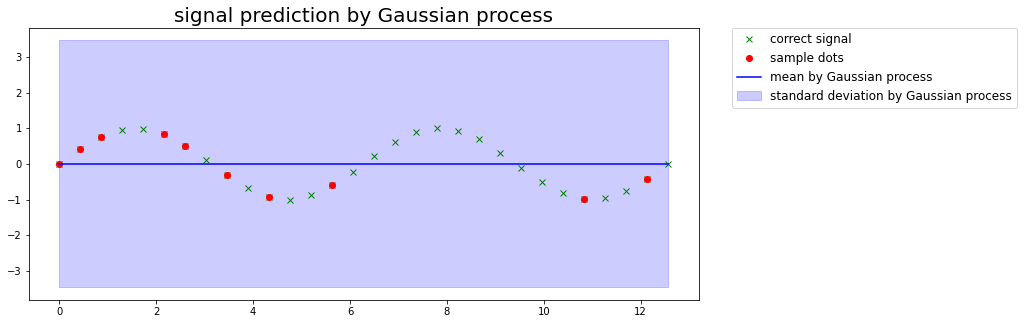

In [80]:
import numpy as np
from matplotlib import pyplot as plt
import itertools
import random
####################
# 元データの作成
n=30
####################
# sin関数
data_x = np.linspace(0, 4*np.pi, n) #np.linspace（最初の値，最後の値，要素数）:要素数を指定する連番や等間隔の配列を生成する．
data_y = np.sin(data_x)
# data_y = data_x #np.random.randn():平均0,分散1の乱数生成
data_y1 = np.sin(data_x)
#####################
# y = x　の関数
# data_x = np.linspace(0, 10, n) #np.linspace（最初の値，最後の値，要素数）:要素数を指定する連番や等間隔の配列を生成する．
# data_y = data_x
# # data_y = data_x #np.random.randn():平均0,分散1の乱数生成
# data_y1 = data_x

m = 0
# sample_index = []
# for num in range(15):
#     sample_index.append(num)


flag1 = 0
sample_index = []
while len(sample_index) < 10:
    r = random.randrange(0, n)
    print('r', r)
    if r not in sample_index:
        sample_index.append(r)
        print('sample', sample_index)
print('sample_index', sample_index)
# sample_index = [1, 3, 6, 8]
# sample_index = [1, 2, 4, 6, 8]
# sample_index = [1, 2, 4, 6, 7, 8]
# sample_index = [0, 1, 2, 3, 4, 5, 6]
# sample_index = [0, 1, 2, 3, 4, 5, 6, 7]
# sample_index = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# sample_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] #学習データ10こ
# sample_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] #学習データ15こ
# sample_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] #学習データ20こ
sample_quantity = len(sample_index)
######################
# ガウスカーネル(RBFカーネル)を関数化
def kernel(x, x_prime, p, q, r):
    if x == x_prime:
        delta = 1
    else:
        delta = 0
    return p*np.exp(-1 * (x - x_prime)**2 / q) + (r * delta)



# データの定義
xtrain = np.copy(data_x[sample_index])
ytrain = np.copy(data_y[sample_index])
ytrain1 = []
for num1 in range(10):
    ytrain1.append(0)
# ytrain1 = [0, 0, 0, 0] #学習データ4こ
# ytrain1 = [0, 0, 0, 0, 0] #5
# ytrain1 = [0, 0, 0, 0, 0, 0] #6
# ytrain1 = [0, 0, 0, 0, 0, 0, 0] #7
# ytrain1 = [0, 0, 0, 0, 0, 0, 0, 0] #8
# ytrain1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #9
# ytrain1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]　#学習データ10こ
# ytrain1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] #学習データ15こ
# ytrain1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] #学習データ20こ

xtest = np.copy(data_x)

# 平均
mu = []
# 分散
var = []
ss = []
BB = []
JJ = []
C_pC_p = []
kk = []
L = []

# 各パラメータ値
Theta_1 = 3
Theta_2 = 5
Theta_3 = 0.0

# 以下，ガウス過程回帰の計算の基本アルゴリズム
train_length = len(xtrain) #len():因数に指定したオブジェクトの長さや要素の数を取得する．
# トレーニングデータ同士のカーネル行列の下地を準備
K = np.zeros((train_length, train_length)) # np.zeros((2,4)):2x4の2次元配列を生成 

for x in range(train_length):  #range(stop): 指定した開始数から終了数までの連続した数値を要素として持つrenge型のオブジェクトを生成する．
    for x_prime in range(train_length):
        K[x, x_prime] = kernel(xtrain[x], xtrain[x_prime], Theta_1, Theta_2, Theta_3)

# 内積はドットで計算
yy = np.dot(np.linalg.inv(K), ytrain1)
# yy = np.dot(np.linalg.inv(K), ytrain)

test_length = len(xtest)
for x_test in range(test_length):

    # テストデータとトレーニングデータ間のカーネル行列の下地を準備
    k = np.zeros((train_length,))   #　train_length個の１次元配列 
    for x in range(train_length):
        k[x] = kernel(xtrain[x], xtest[x_test], Theta_1, Theta_2, Theta_3)

    s = kernel(xtest[x_test], xtest[x_test], Theta_1, Theta_2, Theta_3)
    # print('k', k)
    kk.append(k)
    # 内積はドットで計算して，平均値の配列に追加
    mu.append(np.dot(k, yy))
    J = np.matmul(k, np.linalg.inv(K))
    # print('k',k)
    # print('J',J)
    B = s - np.matmul(J, k.T)
    # print('B',B)
    # print('np.matmul(J, k.T)', np.matmul(J, k.T))
    C_p = B + np.matmul(np.matmul(J, K), J.T)
    ss.append(s)
    BB.append(B)
    JJ.append(J)
    C_pC_p.append(C_p)


    # 先に「k * k^-1」の部分を(内積なのでドットで)計算
    kK_ = np.dot(k, np.linalg.inv(K))
    # 後半部分との内積をドットで計算して，分散の配列に追加
    var.append(s - np.dot(kK_, k.T))
# print('C_pC_p', C_pC_p)
# print('kk', kk)
# print('K', K)
# print('np.linalg.inv(K)', np.linalg.inv(K))
# print('JJ', JJ)
# print('mu', mu)
l = 0
for h in range(n):
    H = (mu[h] - data_y[h]) ** 2
    # print('H', H)
    l = l + H
L.append(l)

# print('l', l)
# print('mu', mu)
# print('C_pC_p', C_pC_p)
plt.figure(figsize=(12, 5))
plt.title('signal prediction by Gaussian process', fontsize=20)

# 元の信号
plt.plot(data_x, data_y1, 'x', color='green', label='correct signal')
# 部分的なサンプル点
plt.plot(data_x[sample_index], data_y[sample_index], 'o', color='red', label='sample dots')

# print('var', var)
# 分散を標準偏差に変換
# std = np.sqrt(np.abs(C_pC_p))
std = np.sqrt(C_pC_p)
# std = np.sqrt(var)

# ガウス過程で求めた平均値を信号化
plt.plot(xtest, mu, color='blue', label='mean by Gaussian process')
# ガウス過程で求めた標準偏差を範囲化 *範囲に関してはコード末を参照
plt.fill_between(xtest, mu + 2*std, mu -2*std, alpha=.2, color='blue', label='standard deviation by Gaussian process')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
# plt.xticks([0, 2, 4, 6, 8, 10, 12])
# plt.yticks([-3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0])
# plt.show() # 平均値±(標準偏差×2) ...95.4%の確率で範囲内に指定の数値が現れる

t=2回目の逐次ガウス過程

l 14.740817347942901


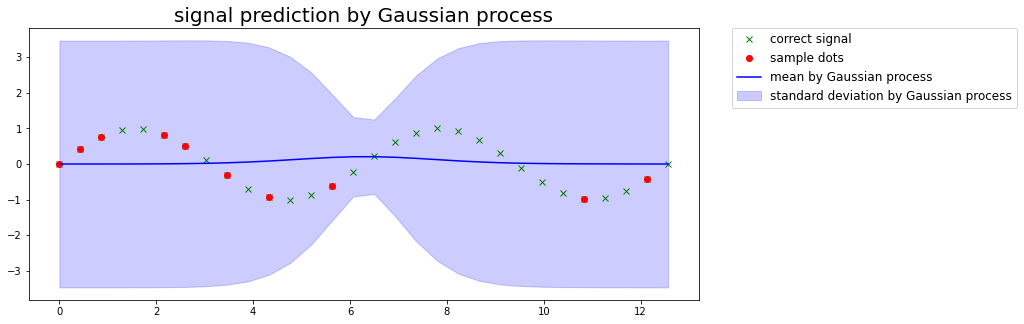

In [81]:
##事後分布を作成し，事前分布に回す#####
# 新たな入力x_sin, 出力y_sin
flag = 0
while flag == 0:
    r = random.randrange(0, n) # 0以上n未満の整数をランダムで選ぶ
    if r not in sample_index:
        flag = 1

x_sin = data_x[r]
y_sin = data_y[r]


GG = JJ[r].T / C_pC_p[r]
G = np.matmul(K, GG.T)
G = np.array([G])
G = G.T
# print('G',G)

mu_f = G * (y_sin - mu[r])
mu_f = list(itertools.chain.from_iterable(mu_f))
# C_f = K - np.dot(G, np.dot(JJ[4].T, K))  # これだとうまく計算できていない
G2 = np.array([np.matmul(JJ[r].T, K)])
# # print('G2', G2)
C_f = K - np.matmul(G, G2)
# C_f = list(itertools.chain.from_iterable(C_f))
# print('K', K)
# print('JJ[4]', JJ[4])
# print('np.matmul(G, G2)', np.matmul(G, G2))
# print('list(itertools.chain.from_iterable(mu_f))', list(itertools.chain.from_iterable(mu_f)))
# print('mu_f', mu_f)
# print('C_f', C_f)
################################
# 平均
mu1 = []
# 分散
var1 = []
ss1 = []
BB1 = []
JJ1 = []
C_pC_p1 = []

# 各パラメータ値
# Theta_1 = 1.0
# Theta_2 = 0.4
# Theta_3 = 0.1

# 以下，ガウス過程回帰の計算の基本アルゴリズム
# train_length = len(xtrain) #len():因数に指定したオブジェクトの長さや要素の数を取得する．
# print('m % sample_quantity', m % sample_quantity)
# w = m % sample_quantity
# sample_index[w] = r
# データの定義
xtrain = np.copy(data_x[sample_index])
ytrain = np.copy(data_y[sample_index])
train_length = len(xtrain) #len():因数に指定したオブジェクトの長さや要素の数を取得する．
# トレーニングデータ同士のカーネル行列の下地を準備
K1 = np.zeros((train_length, train_length)) # np.zeros((2,4)):2x4の2次元配列を生成 

for x in range(train_length):  #range(stop): 指定した開始数から終了数までの連続した数値を要素として持つrenge型のオブジェクトを生成する．
    for x_prime in range(train_length):
        K1[x, x_prime] = kernel(xtrain[x], xtrain[x_prime], Theta_1, Theta_2, Theta_3)

test_length = len(xtest)
for x_test in range(test_length):

    # テストデータとトレーニングデータ間のカーネル行列の下地を準備
    k1 = np.zeros((train_length,))   #　train_length個の１次元配列  
    for x in range(train_length):
        k1[x] = kernel(xtrain[x], xtest[x_test], Theta_1, Theta_2, Theta_3)

    s1 = kernel(xtest[x_test], xtest[x_test], Theta_1, Theta_2, Theta_3)

    # 内積はドットで計算して，平均値の配列に追加
    J1 = np.matmul(k1.T, np.linalg.inv(K1))
    mu1.append(np.matmul(J1, mu_f))
    # print('mu1', mu1)
    B1 = s1 - np.matmul(J1, k1)
    C_p1 = B1 + np.matmul(J1, np.matmul(C_f, J1.T))
    # print('C_p1', C_p1)
    ss1.append(s1)
    BB1.append(B1)
    JJ1.append(J1)
    C_pC_p1.append(C_p1)

    # 先に「k * k^-1」の部分を(内積なのでドットで)計算
    kK_1 = np.dot(k1, np.linalg.inv(K1))
    # 後半部分との内積をドットで計算して，分散の配列に追加
    var1.append(s1 - np.dot(kK_1, k1.T))

l = 0
m = m + 1
for h in range(n):
    H = (mu1[h] - data_y[h]) ** 2
    # print('H', H)
    l = l + H
L.append(l)

print('l', l)
plt.figure(figsize=(12, 5))
plt.title('signal prediction by Gaussian process', fontsize=20)

# 元の信号
plt.plot(data_x, data_y1, 'x', color='green', label='correct signal')
# 部分的なサンプル点
plt.plot(data_x[sample_index], data_y[sample_index], 'o', color='red', label='sample dots')

# 分散を標準偏差に変換
# print('mu1', mu1)
# print('C_pC_p1', C_pC_p1)
# std1 = np.sqrt(np.abs(C_pC_p1))
# print('JJ1', JJ1)
# print('BB1', BB1)
std1 = np.sqrt(C_pC_p1)
# print('std1', std1)

# ガウス過程で求めた平均値を信号化
plt.plot(xtest, mu1, color='blue', label='mean by Gaussian process')
# ガウス過程で求めた標準偏差を範囲化 *範囲に関してはコード末を参照
# print('mu1 + 2*std1', mu1 + 2*std1)
plt.fill_between(xtest, mu1 + 2*std1, mu1 -2*std1, alpha=.2, color='blue', label='standard deviation by Gaussian process')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
# plt.xticks([0, 2, 4, 6, 8, 10, 12])
# plt.yticks([-3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0])
plt.show() # 平均値±(標準偏差×2) ...95.4%の確率で範囲内に指定の数値が現れる

t=3回目

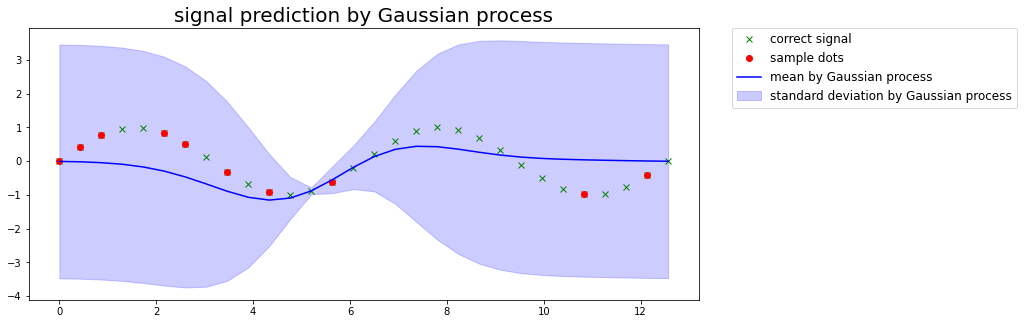

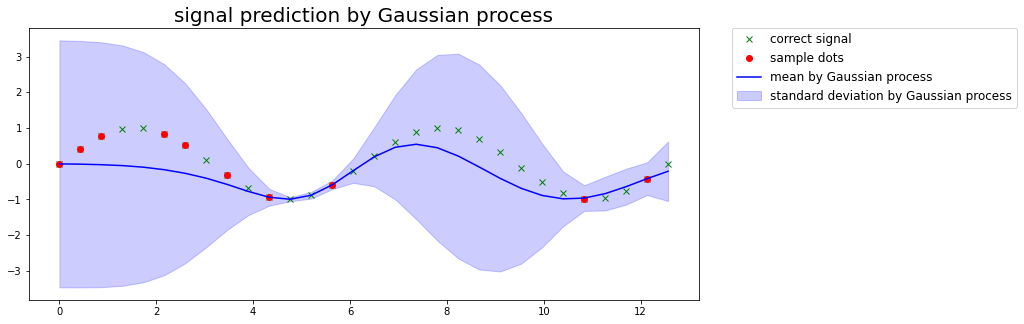

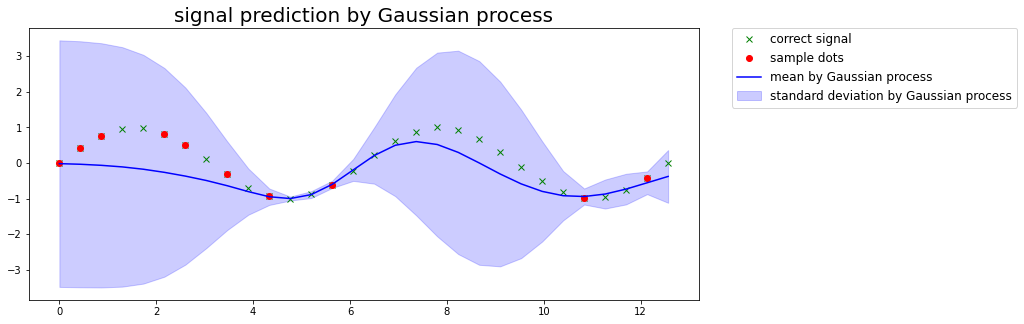

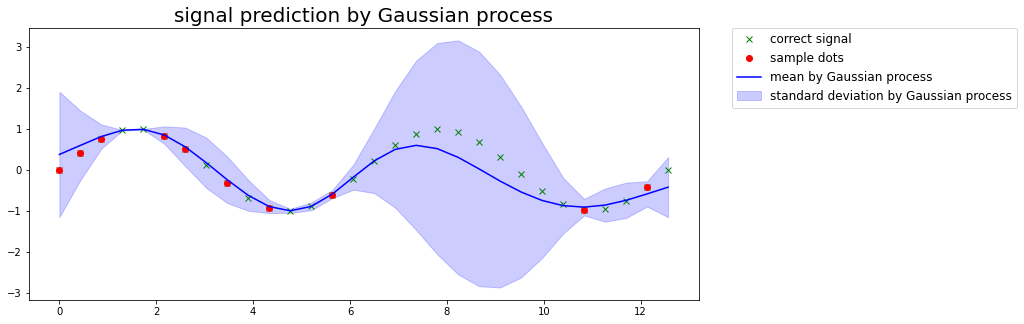

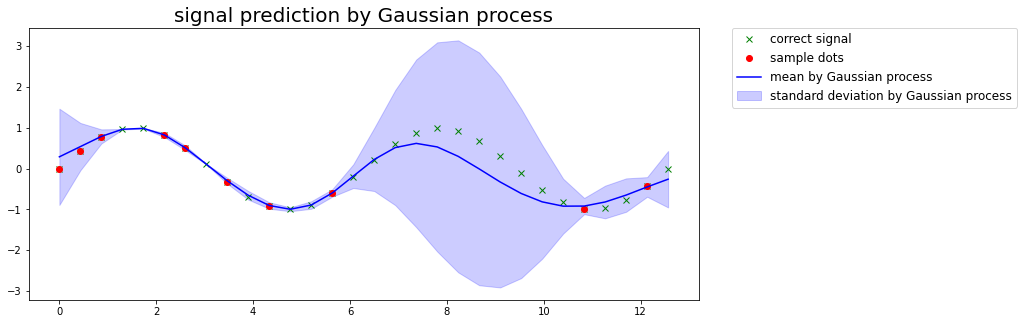

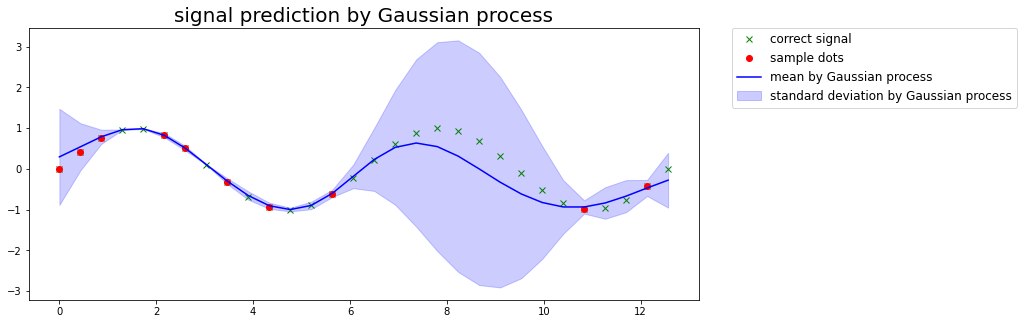

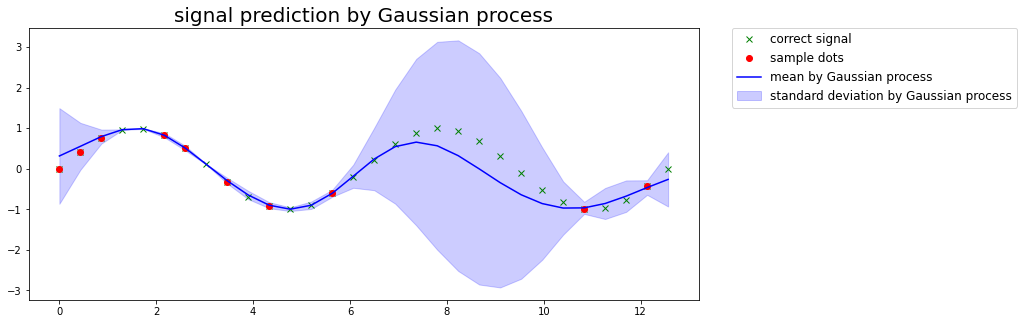

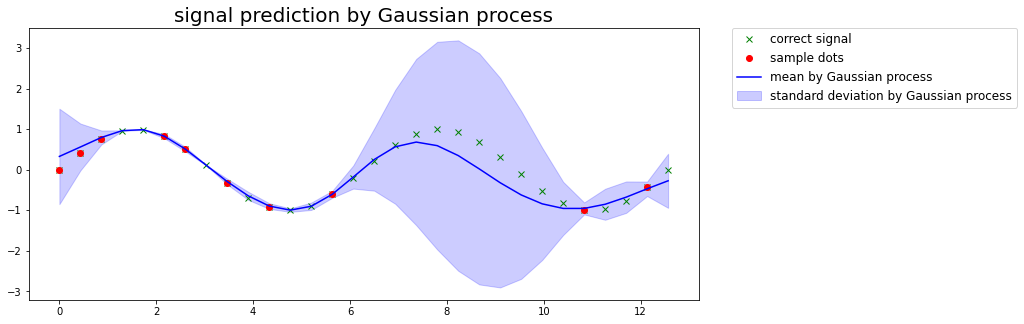

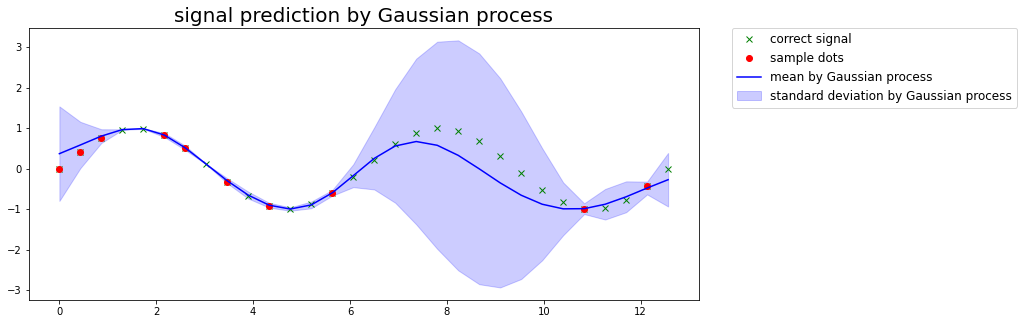

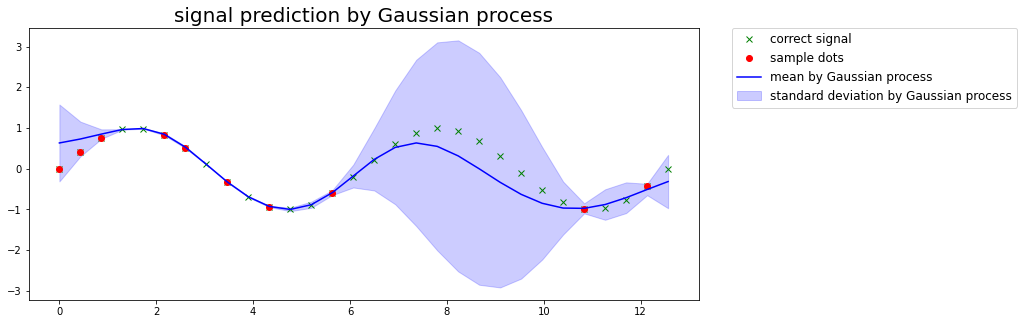

In [82]:
for step in range(100):##事後分布を作成し，事前分布に回す#####
    # 新たな入力x_sin, 出力y_sin
    flag = 0
    while flag == 0:
        r = random.randrange(0, n) # 0以上n未満の整数をランダムで選ぶ
        if r not in sample_index:
            flag = 1
    x_sin = data_x[r]
    y_sin = data_y[r]

    GG = JJ1[r].T / C_pC_p1[r]
    G = np.dot(C_f, GG)
    G = np.array([G])
    G = G.T

    # print('np.array([mu_f])', np.array([mu_f]))
    # print('G * (y_sin - mu1[5])', G * (y_sin - mu1[5]))
    mu_f1 = np.array([mu_f]) + (G * (y_sin - mu1[r])).T
    mu_f1 = list(itertools.chain.from_iterable(mu_f1))
    # print('mu_f1', mu_f1)
    G2 = np.array([np.matmul(JJ1[r].T, C_f)])
    C_f1 = C_f - np.dot(G, G2)
    ##############################
    # 平均
    mu1 = []
    # 分散
    var1 = []
    ss1 = []
    BB1 = []
    JJ1 = []
    C_pC_p1 = []
    
    # 各パラメータ値
    # Theta_1 = 1.0
    # Theta_2 = 0.4
    # Theta_3 = 0.1
    
    # 以下，ガウス過程回帰の計算の基本アルゴリズム
    # train_length = len(xtrain) #len():因数に指定したオブジェクトの長さや要素の数を取得する．
    # print('m % sample_quantity', m % sample_quantity)
    # w = m % sample_quantity
    # sample_index[w] = r
    # データの定義
    xtrain = np.copy(data_x[sample_index])
    ytrain = np.copy(data_y[sample_index])
    train_length = len(xtrain) #len():因数に指定したオブジェクトの長さや要素の数を取得する．
    # トレーニングデータ同士のカーネル行列の下地を準備
    K1 = np.zeros((train_length, train_length)) # np.zeros((2,4)):2x4の2次元配列を生成 
    
    for x in range(train_length):  #range(stop): 指定した開始数から終了数までの連続した数値を要素として持つrenge型のオブジェクトを生成する．
        for x_prime in range(train_length):
            K1[x, x_prime] = kernel(xtrain[x], xtrain[x_prime], Theta_1, Theta_2, Theta_3)
    
    test_length = len(xtest)
    for x_test in range(test_length):
    
        # テストデータとトレーニングデータ間のカーネル行列の下地を準備
        k1 = np.zeros((train_length,))   #　train_length個の１次元配列  
        for x in range(train_length):
            k1[x] = kernel(xtrain[x], xtest[x_test], Theta_1, Theta_2, Theta_3)
    
        s1 = kernel(xtest[x_test], xtest[x_test], Theta_1, Theta_2, Theta_3)
    
        # 内積はドットで計算して，平均値の配列に追加
        J1 = np.matmul(k1.T, np.linalg.inv(K1))
        # print('J1', J1)
        # print('mu_f1', mu_f1)
        mu1.append(np.matmul(J1, mu_f1))
        B1 = s1 - np.matmul(J1, k1)
        C_p1 = B1 + np.matmul(J1, np.matmul(C_f1, J1.T))   #仮に　正しいのは上の式
        ss1.append(s1)
        BB1.append(B1)
        JJ1.append(J1)
        C_pC_p1.append(C_p1)
    
        # 先に「k * k^-1」の部分を(内積なのでドットで)計算
        kK_1 = np.dot(k1, np.linalg.inv(K1))
        # 後半部分との内積をドットで計算して，分散の配列に追加
        var1.append(s1 - np.dot(kK_1, k1.T))
    
    l = 0
    m = m + 1
    for h in range(n):
        H = (mu1[h] - data_y[h]) ** 2
        # print('H', H)
        l = l + H
    L.append(l)
    
    # print('l', l)
    # print('mu1', mu1)
    # print('C_pC_p1', C_pC_p1)
    mu_f = mu_f1
    C_f = C_f1
    # print('L', L)
    if step % 10 == 0: 
        plt.figure(figsize=(12, 5))
        plt.title('signal prediction by Gaussian process', fontsize=20)

        # 元の信号
        plt.plot(data_x, data_y1, 'x', color='green', label='correct signal')
        # 部分的なサンプル点
        plt.plot(data_x[sample_index], data_y[sample_index], 'o', color='red', label='sample dots')

        # 分散を標準偏差に変換
        # print('C_pC_p1', C_pC_p1)
        # std1 = np.sqrt(np.abs(C_pC_p1))
        std1 = np.sqrt(C_pC_p1)

        # ガウス過程で求めた平均値を信号化
        plt.plot(xtest, mu1, color='blue', label='mean by Gaussian process')
        # ガウス過程で求めた標準偏差を範囲化 *範囲に関してはコード末を参照
        plt.fill_between(xtest, mu1 + 2*std1, mu1 -2*std1, alpha=.2, color='blue', label='standard deviation by Gaussian process')

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
        # plt.xticks([0, 2, 4, 6, 8, 10, 12])
        # plt.yticks([-3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0])
        plt.show() # 平均値±(標準偏差×2) ...95.4%の確率で範囲内に指定の数値が現れる
    # plt.figure(figsize=(12, 5))
    # plt.title('signal prediction by Gaussian process', fontsize=20)
    # # 元の信号
    # plt.plot(data_x, data_y1, 'x', color='green', label='correct signal')
    # # 部分的なサンプル点
    # plt.plot(data_x[sample_index], data_y[sample_index], 'o', color='red', label='sample dots')
    # # 分散を標準偏差に変換
    # # print('C_pC_p1', C_pC_p1)
    # # std1 = np.sqrt(np.abs(C_pC_p1))
    # std1 = np.sqrt(C_pC_p1)
    # # ガウス過程で求めた平均値を信号化
    # plt.plot(xtest, mu1, color='blue', label='mean by Gaussian process')
    # # ガウス過程で求めた標準偏差を範囲化 *範囲に関してはコード末を参照
    # plt.fill_between(xtest, mu1 + 2*std1, mu1 -2*std1, alpha=.2, color='blue', label='standard deviation by Gaussian process')
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
    # # plt.xticks([0, 2, 4, 6, 8, 10, 12])
    # # plt.yticks([-3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0])
    # plt.show() # 平均値±(標準偏差×2) ...95.4%の確率で範囲内に指定の数値が現れる

途中から違う観測モデルの結果を入れてみる

In [83]:
# for step in range(100):##事後分布を作成し，事前分布に回す#####
#     # 新たな入力x_sin, 出力y_sin
#     flag = 0
#     while flag == 0:
#         r = random.randrange(0, n) # 0以上n未満の整数をランダムで選ぶ
#         if r not in sample_index:
#             flag = 1
#     x_sin = data_x[r]
#     ycos = np.cos(data_x)
#     y_sin = ycos[r]

#     GG = JJ1[r].T / C_pC_p1[r]
#     G = np.dot(C_f, GG)
#     G = np.array([G])
#     G = G.T

#     # print('np.array([mu_f])', np.array([mu_f]))
#     # print('G * (y_sin - mu1[5])', G * (y_sin - mu1[5]))
#     mu_f1 = np.array([mu_f]) + (G * (y_sin - mu1[r])).T
#     mu_f1 = list(itertools.chain.from_iterable(mu_f1))
#     # print('mu_f1', mu_f1)
#     G2 = np.array([np.matmul(JJ1[r].T, C_f)])
#     C_f1 = C_f - np.dot(G, G2)
#     ##############################
#     # 平均
#     mu1 = []
#     # 分散
#     var1 = []
#     ss1 = []
#     BB1 = []
#     JJ1 = []
#     C_pC_p1 = []
    
#     # 各パラメータ値
#     # Theta_1 = 1.0
#     # Theta_2 = 0.4
#     # Theta_3 = 0.1
    
#     # 以下，ガウス過程回帰の計算の基本アルゴリズム
#     # train_length = len(xtrain) #len():因数に指定したオブジェクトの長さや要素の数を取得する．
#     # print('m % sample_quantity', m % sample_quantity)
#     # w = m % sample_quantity
#     # sample_index[w] = r
#     # データの定義
#     xtrain = np.copy(data_x[sample_index])
#     ytrain = np.copy(data_y[sample_index])
#     train_length = len(xtrain) #len():因数に指定したオブジェクトの長さや要素の数を取得する．
#     # トレーニングデータ同士のカーネル行列の下地を準備
#     K1 = np.zeros((train_length, train_length)) # np.zeros((2,4)):2x4の2次元配列を生成 
    
#     for x in range(train_length):  #range(stop): 指定した開始数から終了数までの連続した数値を要素として持つrenge型のオブジェクトを生成する．
#         for x_prime in range(train_length):
#             K1[x, x_prime] = kernel(xtrain[x], xtrain[x_prime], Theta_1, Theta_2, Theta_3)
    
#     test_length = len(xtest)
#     for x_test in range(test_length):
    
#         # テストデータとトレーニングデータ間のカーネル行列の下地を準備
#         k1 = np.zeros((train_length,))   #　train_length個の１次元配列  
#         for x in range(train_length):
#             k1[x] = kernel(xtrain[x], xtest[x_test], Theta_1, Theta_2, Theta_3)
    
#         s1 = kernel(xtest[x_test], xtest[x_test], Theta_1, Theta_2, Theta_3)
    
#         # 内積はドットで計算して，平均値の配列に追加
#         J1 = np.matmul(k1.T, np.linalg.inv(K1))
#         # print('J1', J1)
#         # print('mu_f1', mu_f1)
#         mu1.append(np.matmul(J1, mu_f1))
#         B1 = s1 - np.matmul(J1, k1)
#         C_p1 = B1 + np.matmul(J1, np.matmul(C_f1, J1.T))   #仮に　正しいのは上の式
#         ss1.append(s1)
#         BB1.append(B1)
#         JJ1.append(J1)
#         C_pC_p1.append(C_p1)
    
#         # 先に「k * k^-1」の部分を(内積なのでドットで)計算
#         kK_1 = np.dot(k1, np.linalg.inv(K1))
#         # 後半部分との内積をドットで計算して，分散の配列に追加
#         var1.append(s1 - np.dot(kK_1, k1.T))
    
#     l = 0
#     m = m + 1
#     for h in range(n):
#         H = (mu1[h] - data_y[h]) ** 2
#         # print('H', H)
#         l = l + H
#     L.append(l)
    
#     # print('l', l)
#     # print('mu1', mu1)
#     # print('C_pC_p1', C_pC_p1)
#     mu_f = mu_f1
#     C_f = C_f1
#     # print('L', L)
#     if step % 10 == 0: 
#         plt.figure(figsize=(12, 5))
#         plt.title('signal prediction by Gaussian process', fontsize=20)

#         # 元の信号
#         plt.plot(data_x, data_y1, 'x', color='green', label='correct signal')
#         plt.plot(data_x, ycos, 'x', color='black', label='correct signal')
#         # 部分的なサンプル点
#         plt.plot(data_x[sample_index], data_y[sample_index], 'o', color='red', label='sample dots')

#         # 分散を標準偏差に変換
#         # print('C_pC_p1', C_pC_p1)
#         # std1 = np.sqrt(np.abs(C_pC_p1))
#         std1 = np.sqrt(C_pC_p1)

#         # ガウス過程で求めた平均値を信号化
#         plt.plot(xtest, mu1, color='blue', label='mean by Gaussian process')
#         # ガウス過程で求めた標準偏差を範囲化 *範囲に関してはコード末を参照
#         plt.fill_between(xtest, mu1 + 2*std1, mu1 -2*std1, alpha=.2, color='blue', label='standard deviation by Gaussian process')

#         plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
#         # plt.xticks([0, 2, 4, 6, 8, 10, 12])
#         # plt.yticks([-3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0])
#         plt.show() # 平均値±(標準偏差×2) ...95.4%の確率で範囲内に指定の数値が現れる

回帰関数の評価(２乗和誤差)　サンプル数10

t 102
T [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
L [14.5, 14.740817347942901, 11.829213143654334, 9.204929728010034, 8.696783256633879, 8.73373139061313, 6.827421539623233, 6.8882658651731745, 6.953047803773152, 7.028693740608438, 7.077493446487529, 7.629526633575441, 7.674573916558082, 7.6193490769955945, 7.374284689543319, 7.5442314422191155, 7.699917549206507, 7.5601981989080045, 7.6807984219430265, 7.74853534098303, 7.881403913300699, 7.8500234126296355, 7.902991986916884, 7.923857156224002, 2.971744918577738, 2.426572651354475, 2.34678806587376, 2.347038831017105, 2.296345390673333, 2.249920570348819, 2.2509914869929433, 2.2016

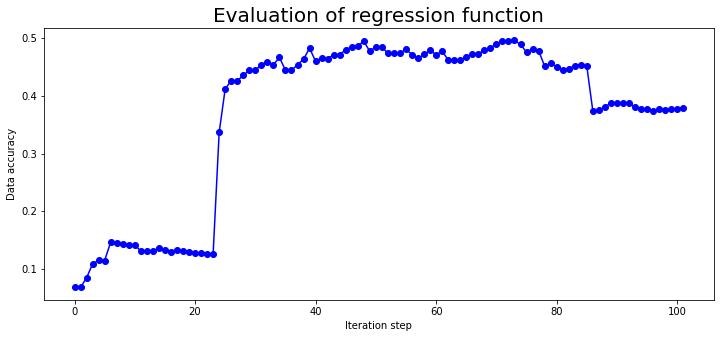

In [84]:
# t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
t = len(L) # 更新ステップ数
print('t', t)
T = []
for z in range(t):
    T.append(z)

print('T', T)
print('L', L)
L = np.reciprocal(L)
plt.figure(figsize=(12, 5))
plt.title('Evaluation of regression function', fontsize=20)

plt.plot(T, L, 'o', color='blue')

plt.plot(T, L, color='blue')
plt.xlabel('Iteration step')
plt.ylabel('Data accuracy')
plt.show()